In [27]:
import numpy as np
import pandas as pd
import scipy.stats
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR

In [28]:
def get_data(model_id,data):

    td = np.load('./databygroup.npy',allow_pickle=True).tolist()
    for k in td.keys():
        if '.csv0' in k:
            pass
        else:
            if model_id == 'MLP':
                data['yt'][k]=td[k][:,[-4,-3,-2,-1]]
            else:
                n=td[k].shape[0]
                data['yt'][k]=td[k][:n-20-1,[-4,-3,-2,-1]]

    for f in td.keys():
        if '.csv0' in f:
            pass
        else:
            data['yp'][f]=pd.read_csv('./results/'+model_id+'/results_'+f).values[:,1:]

def get_mse(data):
    datamaxmin=np.load('./databygroup_maxmin.npy',allow_pickle=True).tolist()

    data['mse']={}
    for k in data['yp'].keys():
        if '.csv0' not in k:
            for km in datamaxmin.keys():
                if km in k:
                    datamax,datamin=datamaxmin[km]['max'],datamaxmin[km]['min']
            datay = data['yp'][k]#(data['yp'][k]*0.5+1)*(datamax[[-4,-3,-2,-1]]-datamin[[-4,-3,-2,-1]])+datamin[[-4,-3,-2,-1]]
            datayT = data['yt'][k]#(data['yt'][k]*0.5+1)*(datamax[[-4,-3,-2,-1]]-datamin[[-4,-3,-2,-1]])+datamin[[-4,-3,-2,-1]]
            data['mse'][k]=np.sqrt(np.mean(np.square(datay-datayT)))
    return data


In [29]:
model_id='MLP'
dataMLP={'yp':{},
         'yt':{},
         'mse':{}}
get_data(model_id,dataMLP)
dataMLP = get_mse(dataMLP)

In [30]:
model_id='LSTM'
dataLSTM={'yp':{},
         'yt':{},
         'mse':{}}
get_data(model_id,dataLSTM)
dataLSTM = get_mse(dataLSTM)

In [31]:
model_id='BLSTM_ATT'
dataATT={'yp':{},
         'yt':{},
         'mse':{}}
get_data(model_id,dataATT)
dataATT = get_mse(dataATT)

/Users/tianwenchong/Desktop/Text12-Koopman-WQ


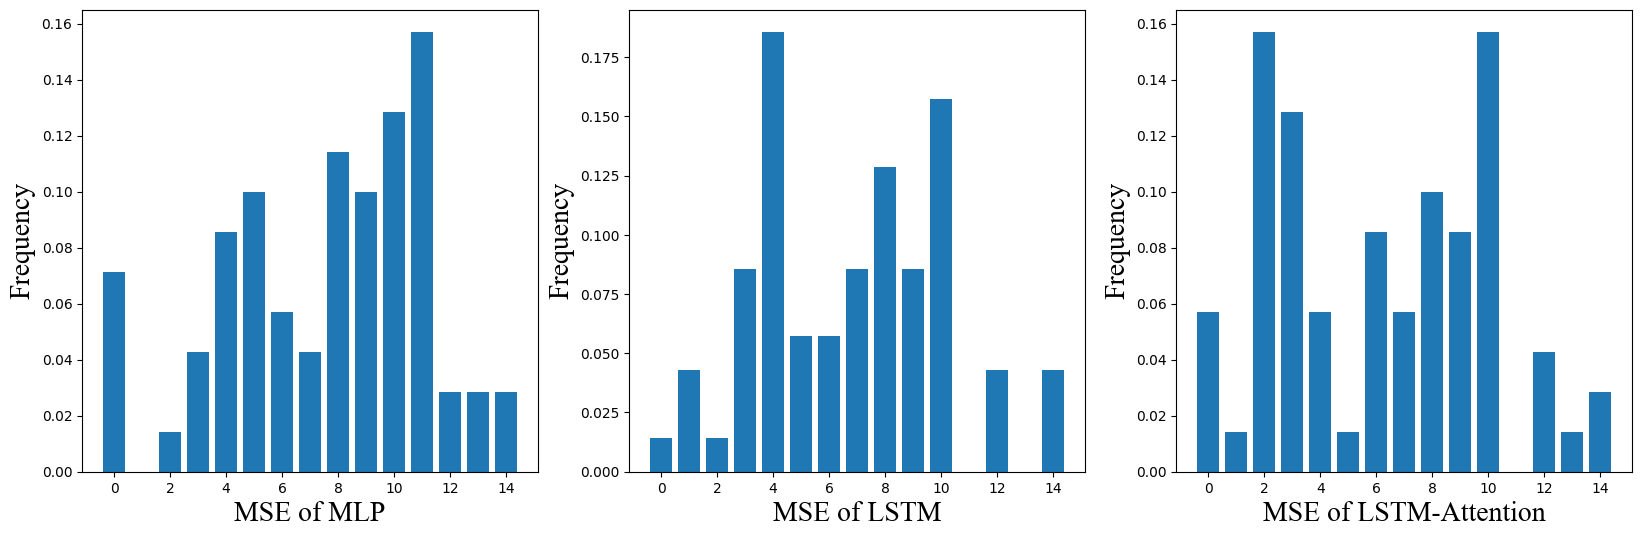

In [32]:
font1={'family':'Times New Roman','weight':'normal','size':20}

fig,ax = plt.subplots(1,3,figsize=(20,6))

mse=[]
for k in dataMLP['mse'].keys():
    mse.append(dataMLP['mse'][k])
p = scipy.stats.relfreq(mse, numbins=15).frequency
ax[0].bar([i for i in range(p.shape[0])],p)
ax[0].set_ylabel('Frequency',font=font1)
ax[0].set_xlabel('MSE of MLP',font=font1)

mse=[]
for k in dataLSTM['mse'].keys():
    mse.append(dataLSTM['mse'][k])
p = scipy.stats.relfreq(mse, numbins=15).frequency
ax[1].bar([i for i in range(p.shape[0])],p)
ax[1].set_ylabel('Frequency',font=font1)
ax[1].set_xlabel('MSE of LSTM',font=font1)

mse=[]
for k in dataATT['mse'].keys():
    mse.append(dataATT['mse'][k])
p = scipy.stats.relfreq(mse, numbins=15).frequency
ax[2].bar([i for i in range(p.shape[0])],p)
ax[2].set_ylabel('Frequency',font=font1)
ax[2].set_xlabel('MSE of LSTM-Attention',font=font1)

os.chdir(os.path.pardir)
print(os.getcwd())
plt.savefig('./fig7.tif',dpi=100)
os.chdir('/Users/tianwenchong/Desktop/Text12-Koopman-WQ/Step3_DNN')